In [543]:
import numpy as np
import os
import re
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import keras
import tensorflow as tf
from PIL import Image
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential,Model
from tensorflow.keras.layers import Input
from keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.preprocessing.image import ImageDataGenerator
#from keras.layers import Conv2D, MaxPooling2D
#from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (
    BatchNormalization, SeparableConv2D, MaxPooling2D, Activation, Flatten, Dropout, Dense, Conv2D
)
from keras.layers import LeakyReLU
from skimage.transform import resize 
from tensorflow.keras.models import load_model

# Leer imágenes 

Este código está diseñado para recorrer un directorio específico y sus subdirectorios, leer todas las imágenes con extensiones .jpg, .jpeg, .png, .bmp, o .tiff, y almacenar información sobre estas imágenes y los directorios donde se encuentran.

In [511]:
imgss = 'C:/Users/Jairo/Downloads/gi/rotate'
# mazda: cx-5, mini: mini cooper 5 puertas, porsche: porsche 911 Carrera S, tesla: model 3, bmw: m3 g80 bmw
dirname = os.path.join(os.getcwd(), imgss)
imgpath = dirname + os.sep 

images = []
directories = []
dircount = []
prevRoot=''
cant=0

print("leyendo imagenes de ",imgpath)

for root, dirnames, filenames in os.walk(imgpath):
    for filename in filenames:
        if re.search("\.(jpg|jpeg|png|bmp|tiff)$", filename):
            cant=cant+1
            filepath = os.path.join(root, filename)
            image = plt.imread(filepath)
            if(len(image.shape)==3):
                
                images.append(image)
            b = "Leyendo..." + str(cant)
            print (b, end="\r")
            if prevRoot !=root:
                print(root, cant)
                prevRoot=root
                directories.append(root)
                dircount.append(cant)
                cant=0
dircount.append(cant)

dircount = dircount[1:]
dircount[0]=dircount[0]+1
print('Directorios leidos:',len(directories))
print("Imagenes en cada directorio", dircount)
print('suma Total de imagenes en subdirs:',sum(dircount))

<>:16: SyntaxWarning: invalid escape sequence '\.'
<>:16: SyntaxWarning: invalid escape sequence '\.'
C:\Users\Jairo\AppData\Local\Temp\ipykernel_22348\2149110518.py:16: SyntaxWarning: invalid escape sequence '\.'
  if re.search("\.(jpg|jpeg|png|bmp|tiff)$", filename):


leyendo imagenes de  C:/Users/Jairo/Downloads/gi/rotate\
C:/Users/Jairo/Downloads/gi/rotate\bmw 1
C:/Users/Jairo/Downloads/gi/rotate\mazda 10380
C:/Users/Jairo/Downloads/gi/rotate\mini 10380
C:/Users/Jairo/Downloads/gi/rotate\porsche 10380
C:/Users/Jairo/Downloads/gi/rotate\tesla 10380
Directorios leidos: 5
Imagenes en cada directorio [10381, 10380, 10380, 10380, 10379]
suma Total de imagenes en subdirs: 51900


# Generación de Etiquetas 

Esta sección del código está asignando una etiqueta numérica a cada imagen basada en el directorio del que proviene. Si un directorio tiene 5 imágenes, todas esas imágenes tendrán la misma etiqueta (por ejemplo, 0), y luego la etiqueta cambiará para el próximo directorio. Esto es útil para clasificar las imágenes según sus directorios de origen.

In [512]:
labels=[]
indice=0
for cantidad in dircount:
    for i in range(cantidad):
        labels.append(indice)
    indice=indice+1
print("Cantidad etiquetas creadas: ",len(labels))

Cantidad etiquetas creadas:  51900


Esta sección del código permite identificar y almacenar los nombres de los subdirectorios de manera organizada, lo cual puede ser útil para el análisis posterior o para referenciar los datos procesados.

In [513]:
carros=[]
indice=0
for directorio in directories:
    name = directorio.split(os.sep)
    print(indice , name[len(name)-1])
    carros.append(name[len(name)-1])
    indice=indice+1

0 bmw
1 mazda
2 mini
3 porsche
4 tesla


Esta sección del código convierte las listas de etiquetas e imágenes en arreglos de NumPy para facilitar su manipulación. Luego, identifica las clases únicas presentes en las etiquetas y calcula el número total de clases, imprimiendo esta información. Esto es útil para entender la distribución de las clases en el conjunto de datos y preparar los datos para análisis o entrenamiento de modelos.

In [514]:
y = np.array(labels)
X = np.array(images, dtype=np.uint8) #convierto de lista a numpy

classes = np.unique(y)
nClasses = len(classes)
print('Total number of outputs : ', nClasses)
print('Output classes : ', classes)


Total number of outputs :  5
Output classes :  [0 1 2 3 4]


Esta sección del código divide el conjunto de datos en dos partes: datos de entrenamiento (80%) y datos de prueba (20%). Luego, imprime las dimensiones de estos conjuntos de datos. Esta división es crucial en el proceso de entrenamiento y evaluación de modelos de aprendizaje automático, ya que permite evaluar el rendimiento del modelo en datos no vistos durante el entrenamiento.

In [515]:
train_X,test_X,train_Y,test_Y = train_test_split(X,y,test_size=0.2)
print('Training data shape : ', train_X.shape, train_Y.shape)
print('Testing data shape : ', test_X.shape, test_Y.shape)

Training data shape :  (41520, 80, 80, 3) (41520,)
Testing data shape :  (10380, 80, 80, 3) (10380,)


Esta sección del código utiliza Matplotlib para mostrar las primeras imágenes de los conjuntos de datos de entrenamiento y de prueba, junto con sus etiquetas correspondientes.

Text(0.5, 1.0, 'Ground Truth : 3')

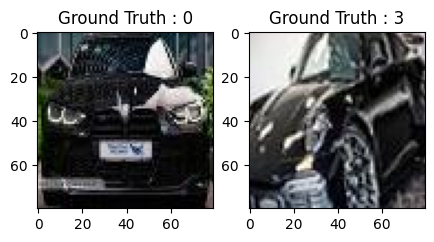

In [516]:
plt.figure(figsize=[5,5])

# Display the first image in training data
plt.subplot(121)
plt.imshow(train_X[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(train_Y[0]))

# Display the first image in testing data
plt.subplot(122)
plt.imshow(test_X[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(test_Y[0]))

Esta sección del código convierte los datos de imágenes a tipo de dato float32 y normaliza los valores de píxel para que estén en el rango [0, 1]. Luego, visualiza una imagen del conjunto de datos de prueba. La normalización es crucial para el entrenamiento efectivo de modelos de aprendizaje automático.

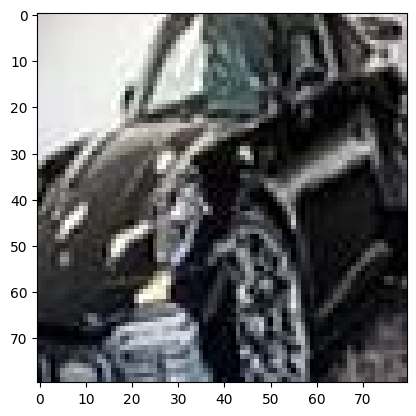

In [517]:
rain_X = train_X.astype('float32')
test_X = test_X.astype('float32')
train_X = train_X/255.
test_X = test_X/255.
plt.imshow(test_X[0,:,:])

Esta sección del código convierte las etiquetas de clase en formato entero a un formato de codificación one-hot. Esto es importante porque muchos algoritmos de aprendizaje automático, especialmente las redes neuronales, funcionan mejor con etiquetas en formato one-hot. Luego, se imprime una etiqueta antes y después de la conversión para verificar el proceso.

In [518]:
train_Y_one_hot = to_categorical(train_Y)
test_Y_one_hot = to_categorical(test_Y)
print('Original label:', train_Y[0])
print('After conversion to one-hot:', train_Y_one_hot[0])

Original label: 0
After conversion to one-hot: [1. 0. 0. 0. 0.]


Esta sección del código toma el conjunto de datos de entrenamiento y lo divide en dos conjuntos: uno para continuar el entrenamiento y otro para la validación. La validación es una parte crucial del proceso de entrenamiento de modelos de aprendizaje automático porque permite evaluar el rendimiento del modelo en datos no vistos durante el entrenamiento, ayudando a prevenir el sobreajuste.

In [519]:
#Mezclar todo y crear los grupos de entrenamiento y testing
train_X,valid_X,train_label,valid_label = train_test_split(train_X, train_Y_one_hot, test_size=0.2, random_state=13)

Esta sección del código es útil para verificar que los conjuntos de datos se han dividido correctamente y que las formas de los datos son las esperadas. Esto asegura que los datos estén listos para ser utilizados en el entrenamiento y validación del modelo.

In [520]:
print(train_X.shape,valid_X.shape,train_label.shape,valid_label.shape)

(33216, 80, 80, 3) (8304, 80, 80, 3) (33216, 5) (8304, 5)


Esta sección del código define y configura varios parámetros importantes para el entrenamiento de una red neuronal. Estos parámetros incluyen la tasa de aprendizaje inicial, el número de épocas y el tamaño del lote.

In [521]:
#declaramos variables con los parámetros de configuración de la red
INIT_LR = 1e-3 # Valor inicial de learning rate. El valor 1e-3 corresponde con 0.001
epochs = 30 # Cantidad de iteraciones completas al conjunto de imagenes de entrenamiento
batch_size = 64 # cantidad de imágenes que se toman a la vez en memoria

Esta sección del código define un modelo de red neuronal convolucional (CNN) utilizando la API de Keras. La red consta de varias capas, incluyendo capas convolucionales, de activación, de pooling, de normalización (Dropout) y densas (fully connected).

In [522]:
carros_model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(80, 80, 3)),
    MaxPooling2D((2, 2)),
    Dropout(0.4),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.4),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.4),
    Dense(nClasses, activation='softmax')
])


In [523]:
carros_model.summary()

Model: "sequential_17"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_53 (Conv2D)              │ (None, 78, 78, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_53 (MaxPooling2D) │ (None, 39, 39, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_45 (Dropout)            │ (None, 39, 39, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_54 (Conv2D)              │ (None, 37, 37, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_54 (MaxPooling2D) │ (None, 18, 18, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_55 (Conv2D)              │ (None, 16, 16, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_55 (MaxPooling2D) │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_46 (Dropout)            │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_17 (Flatten)            │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_34 (Dense)                │ (None, 128)            │     1,048,704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_47 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_35 (Dense)                │ (None, 5)              │           645 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,142,597 (4.36 MB)

 Trainable params: 1,142,597 (4.36 MB)

 Non-trainable params: 0 (0.00 B)

Esta sección del código configura la función de pérdida, el optimizador y las métricas que se utilizarán durante el entrenamiento del modelo. La compilación del modelo es un paso crucial que prepara el modelo para ser entrenado con los datos.

In [524]:
carros_model.compile(
    loss=keras.losses.categorical_crossentropy,
    optimizer=tf.keras.optimizers.Adam(learning_rate=INIT_LR, decay=INIT_LR /100), #, decay=INIT_LR / 100
    metrics=['accuracy']
)


Esta sección del código entrena el modelo de red neuronal convolucional utilizando los datos de entrenamiento. Durante el entrenamiento, el modelo se ajusta iterativamente a los datos, actualizando sus parámetros para minimizar la función de pérdida. El conjunto de datos de validación se utiliza para monitorear el rendimiento del modelo y prevenir el sobreajuste.

In [525]:
carros_train = carros_model.fit(
    train_X, train_label, 
    batch_size=batch_size,
    epochs=epochs,
    verbose=1,
    validation_data=(valid_X, valid_label)
    )



Epoch 1/30
519/519 ━━━━━━━━━━━━━━━━━━━━ 115s 216ms/step - accuracy: 0.3141 - loss: 1.5107 - val_accuracy: 0.6283 - val_loss: 1.0293
Epoch 2/30
519/519 ━━━━━━━━━━━━━━━━━━━━ 123s 237ms/step - accuracy: 0.6252 - loss: 0.9846 - val_accuracy: 0.7923 - val_loss: 0.6206
Epoch 3/30
519/519 ━━━━━━━━━━━━━━━━━━━━ 125s 240ms/step - accuracy: 0.7553 - loss: 0.6757 - val_accuracy: 0.8428 - val_loss: 0.4623
Epoch 4/30
519/519 ━━━━━━━━━━━━━━━━━━━━ 124s 239ms/step - accuracy: 0.8024 - loss: 0.5540 - val_accuracy: 0.8631 - val_loss: 0.4054
Epoch 5/30
519/519 ━━━━━━━━━━━━━━━━━━━━ 142s 239ms/step - accuracy: 0.8355 - loss: 0.4694 - val_accuracy: 0.8798 - val_loss: 0.3579
Epoch 6/30
519/519 ━━━━━━━━━━━━━━━━━━━━ 125s 242ms/step - accuracy: 0.8587 - loss: 0.4096 - val_accuracy: 0.8934 - val_loss: 0.3132
Epoch 7/30
519/519 ━━━━━━━━━━━━━━━━━━━━ 122s 236ms/step - accuracy: 0.8666 - loss: 0.3713 - val_accuracy: 0.9016 - val_loss: 0.2882
Epoch 8/30
519/519 ━━━━━━━━━━━━━━━━━━━━ 121s 233ms/step - accuracy: 0.8732 -

In [526]:
carros_model.save("carros.keras")

In [527]:
test_eval = carros_model.evaluate(test_X, test_Y_one_hot, verbose=1)

325/325 ━━━━━━━━━━━━━━━━━━━━ 7s 20ms/step - accuracy: 0.9505 - loss: 0.1588


In [528]:
print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])

Test loss: 0.1601358950138092
Test accuracy: 0.9482659101486206


In [529]:
carros_train.history

{'accuracy': [0.41711825132369995,
  0.661608874797821,
  0.7638788819313049,
  0.8097904920578003,
  0.8360127806663513,
  0.8551902770996094,
  0.8675638437271118,
  0.8731033205986023,
  0.8854768872261047,
  0.8867714405059814,
  0.8973687291145325,
  0.903841495513916,
  0.9046844840049744,
  0.9110067486763,
  0.913625955581665,
  0.9169677495956421,
  0.921272873878479,
  0.9235910177230835,
  0.9258791208267212,
  0.9297025799751282,
  0.9287993907928467,
  0.9319605231285095,
  0.9336464405059814,
  0.9337969422340393,
  0.9360548853874207,
  0.9375903010368347,
  0.9395471811294556,
  0.9414137601852417,
  0.9426782131195068,
  0.9397579431533813],
 'loss': [1.375860571861267,
  0.9016895294189453,
  0.6560651063919067,
  0.5356036424636841,
  0.4690483808517456,
  0.41526681184768677,
  0.3743409812450409,
  0.35781386494636536,
  0.32471150159835815,
  0.3168284595012665,
  0.2908845543861389,
  0.2739390432834625,
  0.26429128646850586,
  0.2525499165058136,
  0.2431050091

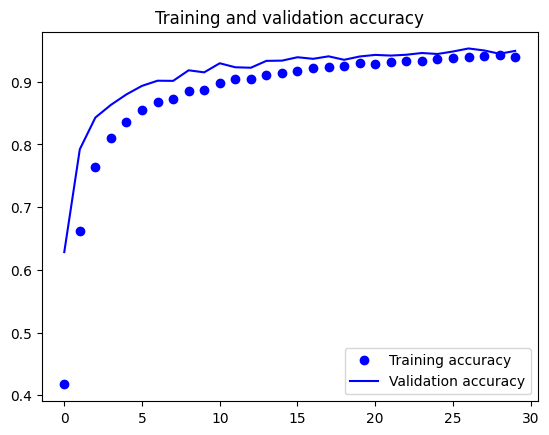

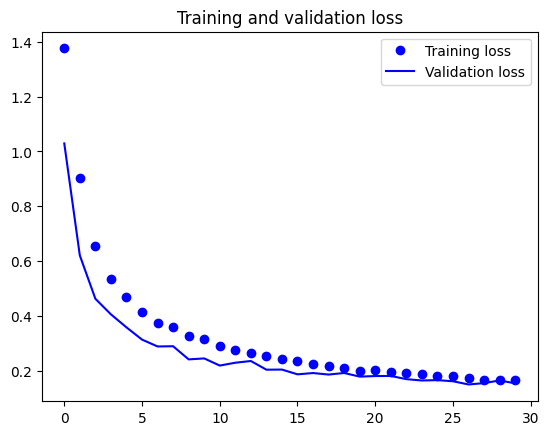

In [530]:
accuracy = carros_train.history['accuracy']
val_accuracy = carros_train.history['val_accuracy']
loss = carros_train.history['loss']
val_loss = carros_train.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [531]:
predicted_classes2 = carros_model.predict(test_X)

325/325 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step


In [532]:
predicted_classes=[]
for predicted_carros in predicted_classes2:
    predicted_classes.append(predicted_carros.tolist().index(max(predicted_carros)))
predicted_classes=np.array(predicted_classes)

In [533]:
predicted_classes.shape, test_Y.shape

((10380,), (10380,))

Found 9843 correct labels


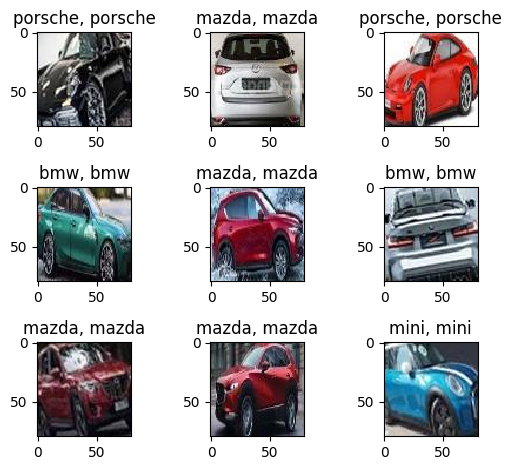

In [534]:
correct = np.where(predicted_classes==test_Y)[0]
print("Found %d correct labels" % len(correct))
for i, correct in enumerate(correct[0:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(test_X[correct].reshape(80,80,3), cmap='gray', interpolation='none')
    plt.title("{}, {}".format(carros[predicted_classes[correct]],
                                                    carros[test_Y[correct]]))

    plt.tight_layout()

Found 537 incorrect labels


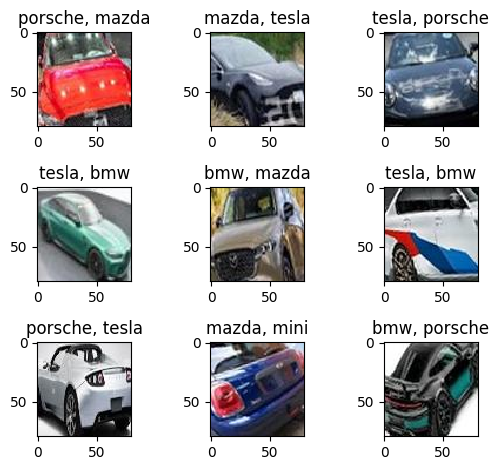

In [535]:
incorrect = np.where(predicted_classes!=test_Y)[0]
print("Found %d incorrect labels" % len(incorrect))
for i, incorrect in enumerate(incorrect[0:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(test_X[incorrect].reshape(80,80,3), cmap='gray', interpolation='none')
    plt.title("{}, {}".format(carros[predicted_classes[incorrect]],
                                                    carros[test_Y[incorrect]]))
    plt.tight_layout()

In [536]:
target_names = ["Class {}".format(i) for i in range(nClasses)]
print(classification_report(test_Y, predicted_classes, target_names=target_names))

              precision    recall  f1-score   support

     Class 0       0.94      0.95      0.94      2055
     Class 1       0.94      0.96      0.95      2150
     Class 2       0.97      0.96      0.96      2055
     Class 3       0.95      0.95      0.95      2080
     Class 4       0.95      0.93      0.94      2040

    accuracy                           0.95     10380
   macro avg       0.95      0.95      0.95     10380
weighted avg       0.95      0.95      0.95     10380



In [550]:
from skimage.transform import resize 

images=[]
# AQUI ESPECIFICAMOS UNAS IMAGENES
filenames = ['./teslaPrueba1.jpg', './teslaPrueba2.jpg', './teslaPrueba3.jpg', './pruebas/tesla/tesla (1).jpg', './pruebas/tesla/tesla (10).jpg', './pruebas/tesla/tesla (2).jpg', './pruebas/tesla/tesla (3).jpg', './pruebas/tesla/tesla (4).jpg', './pruebas/tesla/tesla (5).jpg', './pruebas/tesla/tesla (6).jpg', './pruebas/tesla/tesla (7).jpg', './pruebas/tesla/tesla (8).jpg', './pruebas/tesla/tesla (9).jpg']

for filepath in filenames:
    image = plt.imread(filepath,0)
    image_resized = resize(image, (80,80),anti_aliasing=True,clip=False,preserve_range=True)
    images.append(image_resized)

X = np.array(images, dtype=np.uint8) #convierto de lista a numpy
test_X = X.astype('float32')
test_X = test_X / 255

predicted_classes = carros_model.predict(test_X)

for i, img_tagged in enumerate(predicted_classes):
    print(filenames[i], carros[img_tagged.tolist().index(max(img_tagged))])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
./teslaPrueba1.jpg tesla
./teslaPrueba2.jpg tesla
./teslaPrueba3.jpg tesla
./pruebas/tesla/tesla (1).jpg mini
./pruebas/tesla/tesla (10).jpg mazda
./pruebas/tesla/tesla (2).jpg mazda
./pruebas/tesla/tesla (3).jpg tesla
./pruebas/tesla/tesla (4).jpg mazda
./pruebas/tesla/tesla (5).jpg mini
./pruebas/tesla/tesla (6).jpg tesla
./pruebas/tesla/tesla (7).jpg bmw
./pruebas/tesla/tesla (8).jpg mazda
./pruebas/tesla/tesla (9).jpg tesla


In [551]:


images=[]
# AQUI ESPECIFICAMOS UNAS IMAGENES
filenames = ['./bmwPrueba1.jpg', './bmwPrueba2.jpg', './bmwPrueba3.jpg', './pruebas/bmw/mini (1).jpg', './pruebas/bmw/mini (10).jpg', './pruebas/bmw/mini (2).jpg', './pruebas/bmw/mini (3).jpg', './pruebas/bmw/mini (4).jpg', './pruebas/bmw/mini (5).jpg', './pruebas/bmw/mini (6).jpg', './pruebas/bmw/mini (7).jpg', './pruebas/bmw/mini (8).jpg', './pruebas/bmw/mini (9).jpg']

for filepath in filenames:
    image = plt.imread(filepath,0)
    image_resized = resize(image, (80,80),anti_aliasing=True,clip=False,preserve_range=True)
    images.append(image_resized)

X = np.array(images, dtype=np.uint8) #convierto de lista a numpy
test_X = X.astype('float32')
test_X = test_X / 255

predicted_classes = carros_model.predict(test_X)

for i, img_tagged in enumerate(predicted_classes):
    print(filenames[i], carros[img_tagged.tolist().index(max(img_tagged))])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
./bmwPrueba1.jpg bmw
./bmwPrueba2.jpg bmw
./bmwPrueba3.jpg tesla
./pruebas/bmw/mini (1).jpg tesla
./pruebas/bmw/mini (10).jpg bmw
./pruebas/bmw/mini (2).jpg mazda
./pruebas/bmw/mini (3).jpg mazda
./pruebas/bmw/mini (4).jpg bmw
./pruebas/bmw/mini (5).jpg bmw
./pruebas/bmw/mini (6).jpg bmw
./pruebas/bmw/mini (7).jpg tesla
./pruebas/bmw/mini (8).jpg tesla
./pruebas/bmw/mini (9).jpg bmw


In [547]:
images=[]
# AQUI ESPECIFICAMOS UNAS IMAGENES
filenames = ['./mazdaPrueba1.jpg', './mazdaprueba2.jpg', './mazdaprueba3.jpg', './pruebas/mazda/mazda (1).jpg', './pruebas/mazda/mazda (10).jpg', './pruebas/mazda/mazda (2).jpg', './pruebas/mazda/mazda (3).jpg', './pruebas/mazda/mazda (4).jpg', './pruebas/mazda/mazda (5).jpg', './pruebas/mazda/mazda (6).jpg', './pruebas/mazda/mazda (7).jpg', './pruebas/mazda/mazda (8).jpg', './pruebas/mazda/mazda (9).jpg']

for filepath in filenames:
    image = plt.imread(filepath,0)
    image_resized = resize(image, (80,80),anti_aliasing=True,clip=False,preserve_range=True)
    images.append(image_resized)

X = np.array(images, dtype=np.uint8) #convierto de lista a numpy
test_X = X.astype('float32')
test_X = test_X / 255

predicted_classes = carros_model.predict(test_X)

for i, img_tagged in enumerate(predicted_classes):
    print(filenames[i], carros[img_tagged.tolist().index(max(img_tagged))])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
./mazdaPrueba1.jpg mazda
./mazdaprueba2.jpg porsche
./mazdaprueba3.jpg mazda
./pruebas/mazda/mazda (1).jpg bmw
./pruebas/mazda/mazda (10).jpg mazda
./pruebas/mazda/mazda (2).jpg mazda
./pruebas/mazda/mazda (3).jpg mazda
./pruebas/mazda/mazda (4).jpg mazda
./pruebas/mazda/mazda (5).jpg mazda
./pruebas/mazda/mazda (6).jpg mazda
./pruebas/mazda/mazda (7).jpg mazda
./pruebas/mazda/mazda (8).jpg mazda
./pruebas/mazda/mazda (9).jpg bmw


In [548]:
images=[]
# AQUI ESPECIFICAMOS UNAS IMAGENES
filenames = ['./miniPrueba1.jpg', './miniPrueba2.jpg', './miniPrueba3.jpg', './pruebas/mini/mini (1).jpg', './pruebas/mini/mini (10).jpg', './pruebas/mini/mini (2).jpg', './pruebas/mini/mini (3).jpg', './pruebas/mini/mini (4).jpg', './pruebas/mini/mini (5).jpg', './pruebas/mini/mini (6).jpg', './pruebas/mini/mini (7).jpg', './pruebas/mini/mini (8).jpg', './pruebas/mini/mini (9).jpg']

for filepath in filenames:
    image = plt.imread(filepath,0)
    image_resized = resize(image, (80,80),anti_aliasing=True,clip=False,preserve_range=True)
    images.append(image_resized)

X = np.array(images, dtype=np.uint8) #convierto de lista a numpy
test_X = X.astype('float32')
test_X = test_X / 255

predicted_classes = carros_model.predict(test_X)

for i, img_tagged in enumerate(predicted_classes):
    print(filenames[i], carros[img_tagged.tolist().index(max(img_tagged))])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
./miniPrueba1.jpg mini
./miniPrueba2.jpg mazda
./miniPrueba3.jpg bmw
./pruebas/mini/mini (1).jpg mini
./pruebas/mini/mini (10).jpg mini
./pruebas/mini/mini (2).jpg mazda
./pruebas/mini/mini (3).jpg mini
./pruebas/mini/mini (4).jpg mazda
./pruebas/mini/mini (5).jpg mini
./pruebas/mini/mini (6).jpg mini
./pruebas/mini/mini (7).jpg mini
./pruebas/mini/mini (8).jpg tesla
./pruebas/mini/mini (9).jpg mini


In [549]:
images=[]
# AQUI ESPECIFICAMOS UNAS IMAGENES
filenames = ['./porschePrueba1.jpg', './porschePrueba2.jpg', './porschePrueba3.jpg', './pruebas/porsche/prsche (1).jpg', './pruebas/porsche/prsche (10).jpg', './pruebas/porsche/prsche (2).jpg', './pruebas/porsche/prsche (3).jpg', './pruebas/porsche/prsche (4).jpg', './pruebas/porsche/prsche (5).jpg', './pruebas/porsche/prsche (6).jpg', './pruebas/porsche/prsche (7).jpg', './pruebas/porsche/prsche (8).jpg', './pruebas/porsche/prsche (9).jpg']

for filepath in filenames:
    image = plt.imread(filepath,0)
    image_resized = resize(image, (80,80),anti_aliasing=True,clip=False,preserve_range=True)
    images.append(image_resized)

X = np.array(images, dtype=np.uint8) #convierto de lista a numpy
test_X = X.astype('float32')
test_X = test_X / 255

predicted_classes = carros_model.predict(test_X)

for i, img_tagged in enumerate(predicted_classes):
    print(filenames[i], carros[img_tagged.tolist().index(max(img_tagged))])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
./porschePrueba1.jpg bmw
./porschePrueba2.jpg bmw
./porschePrueba3.jpg tesla
./pruebas/porsche/prsche (1).jpg bmw
./pruebas/porsche/prsche (10).jpg mazda
./pruebas/porsche/prsche (2).jpg mazda
./pruebas/porsche/prsche (3).jpg mazda
./pruebas/porsche/prsche (4).jpg mazda
./pruebas/porsche/prsche (5).jpg mazda
./pruebas/porsche/prsche (6).jpg mazda
./pruebas/porsche/prsche (7).jpg mazda
./pruebas/porsche/prsche (8).jpg mazda
./pruebas/porsche/prsche (9).jpg bmw


### Para hacer pruebas locales

In [545]:
carros_model2 = load_model('./carros.keras')
images=[]
# AQUI ESPECIFICAMOS UNAS IMAGENES
filenames = ['mazdaPrueba1.jpg'] #cargar imagenes

for filepath in filenames:
    image = plt.imread(filepath,0)
    image_resized = resize(image, (80,80),anti_aliasing=True,clip=False,preserve_range=True)
    images.append(image_resized)

X = np.array(images, dtype=np.uint8) #convierto de lista a numpy
test_X = X.astype('float32')
test_X = test_X / 255

predicted_classes = carros_model2.predict(test_X)

for i, img_tagged in enumerate(predicted_classes):
    print(filenames[i], carros[img_tagged.tolist().index(max(img_tagged))])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step
mazdaPrueba1.jpg mazda
